<a href="https://colab.research.google.com/github/JuanJGalindo/ML-Theory/blob/main/Distribuci%C3%B3nBinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Distribución Binomial en Inferencia Estadística**

En este cuaderno estudiaremos la **Distribución Binomial**, sus propiedades, visualizaciones y relaciones con otras distribuciones y teoremas relevantes.

##**Definición**

Una variable aleatoria $X$ tiene distribución binomial con parámetros $n$ y $p$ si:

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k=0,1,\dots,n
$$

- $n$: número de ensayos
- $p$: probabilidad de éxito en cada ensayo
- $k$: número de éxitos observados

##**Propiedades**

- Valor esperado:
$$\mathbb{E}[X] = np$$
- Varianza:
$$Var(X) = np(1-p)$$


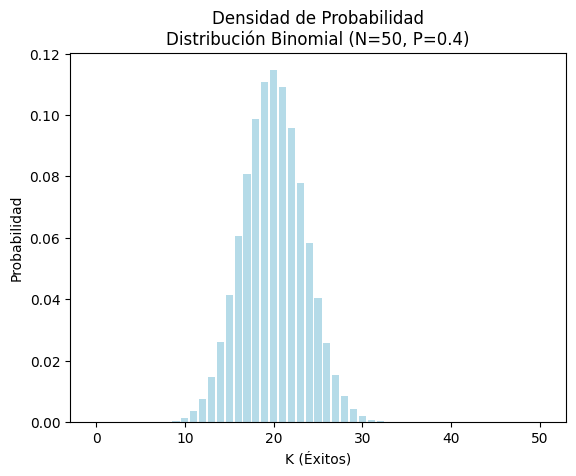

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, norm, multinomial, hypergeom

# Función para Graficar Distribución Binomial
def plotBinomial(n, p):
  xVals = np.arange(0, n+1)
  yVals = binom.pmf(xVals, n, p)
  plt.bar(xVals, yVals, color="lightblue", alpha=0.9)
  plt.title(f"Densidad de Probabilidad\nDistribución Binomial (N={n}, P={p})")
  plt.xlabel("K (Éxitos)")
  plt.ylabel("Probabilidad")
  plt.show()

# Función para Graficar Función de Densidad Acumulada
def plotCumulativeBinomial(n, p):
  xVals = np.arange(0, n+1)
  yVals = binom.cdf(xVals, n, p)
  plt.bar(xVals, yVals, color="lightblue", alpha=0.9)
  plt.title(f"Probabilidad Acumulada\nDistribución Binomial (N={n}, P={p})")
  plt.xlabel("K (Éxitos)")
  plt.ylabel("Probabilidad")
  plt.show()

plotBinomial(50, 0.4)

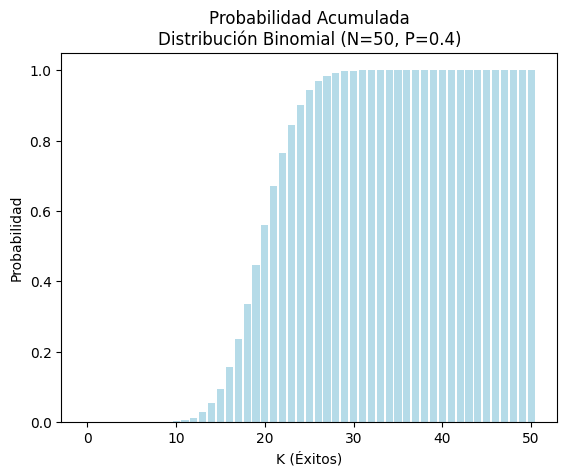

In [150]:
plotCumulativeBinomial(50, 0.4)

## **Función Generadora de Momentos (MGF)**

Para $X\sim Bin(n,p)$:

$$
M_X(t) = (1-p+pe^t)^n.
$$

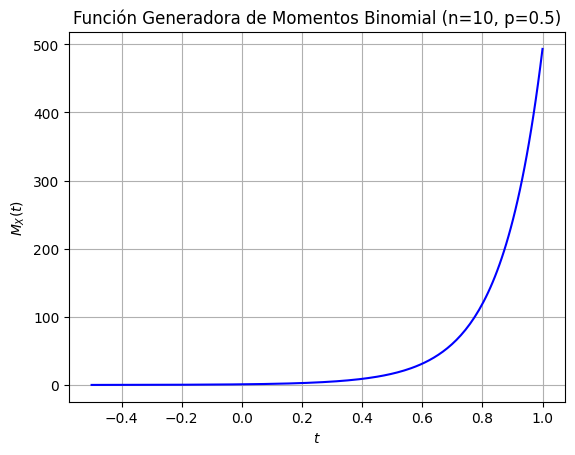

In [151]:
def mgfBinomial(t, n, p):
    return (1 - p + p*np.exp(t))**n

tVals = np.linspace(-0.5, 1, 200)
yVals = mgfBinomial(tVals, 10, 0.5)

plt.plot(tVals, yVals, 'b-')
plt.title("Función Generadora de Momentos Binomial (n=10, p=0.5)")
plt.xlabel("$t$")
plt.ylabel("$M_X(t)$")
plt.grid(True)
plt.show()

##**Relación con la Bernoulli**

Cuando $n=1$, la distribución Binomial se reduce a la distribución **Bernoulli**:

$$
P(X=1) = p, \quad P(X=0)=1-p.
$$

Esto muestra que la Bernoulli es un caso particular de la Binomial.

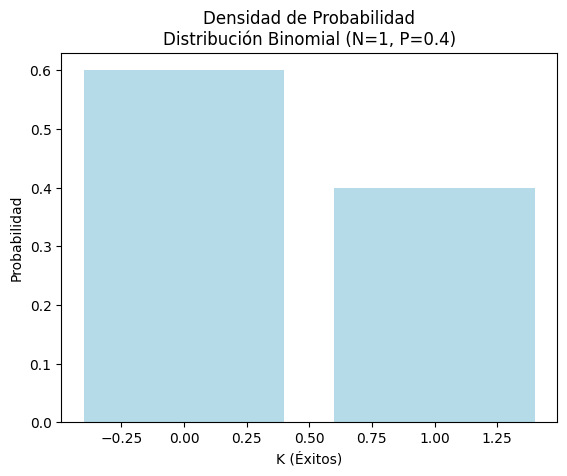

In [152]:
plotBinomial(1, 0.4)

##**Aproximación a Distribución Poisson**

Si $n$ es grande y $p$ es pequeño, entonces:

$$
Binomial(n,p) \approx Poisson(\lambda), \quad \lambda = np.
$$

**Ejemplo:**

Veamos el caso para el que
$$n=100, p=0.05 \Rightarrow \lambda=5$$

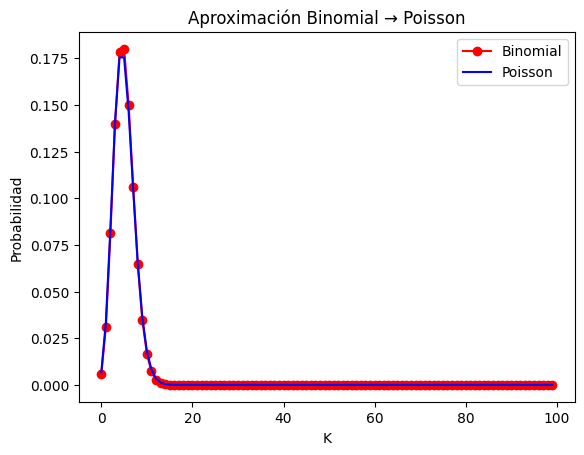

In [153]:
n, p = 100, 0.05
lambdaVal = n*p

xVals = np.arange(0, n)
yBinom = binom.pmf(xVals, n, p)
yPois = poisson.pmf(xVals, lambdaVal)

plt.plot(xVals, yBinom, 'ro-', label="Binomial")
plt.plot(xVals, yPois, 'b-', label="Poisson")
plt.title("Aproximación Binomial → Poisson")
plt.xlabel("K")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()


##**Aproximación a Distribución Normal (Teorema Central del Límite)**

Cuando $n$ es grande, la Binomial se aproxima a una Normal:

$$
Binomial(n,p) \approx N(\mu=np, \sigma^2=np(1-p)).
$$

Esto es consecuencia del **Teorema Central del Límite (TCL)**.

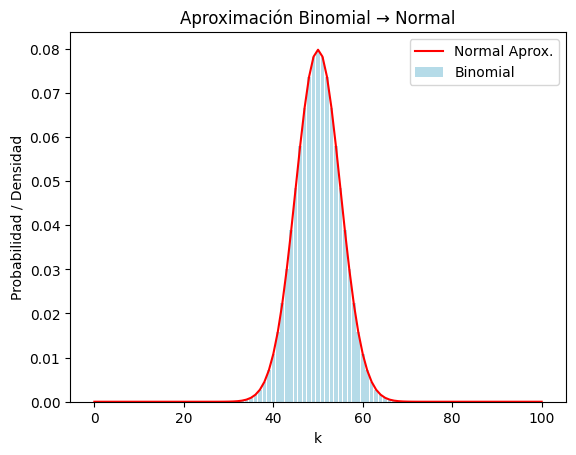

Valor esperado: 50.0
Varianza: 25.0


In [154]:
n, p = 100, 0.5
mu, sigma = n*p, np.sqrt(n*p*(1-p))

xVals = np.arange(0, n+1)
yBinom = binom.pmf(xVals, n, p)
yNorm = norm.pdf(xVals, mu, sigma)

plt.bar(xVals, yBinom, color="lightblue", alpha=0.9, label="Binomial")
plt.plot(xVals, yNorm, 'r-', label="Normal Aprox.")
plt.title("Aproximación Binomial → Normal")
plt.xlabel("k")
plt.ylabel("Probabilidad / Densidad")
plt.legend()
plt.show()

print(f"Valor esperado: {mu}")
print(f"Varianza: {sigma**2}")

## **Distribución Binomial como Caso de la Distribución Multinomial**

La Binomial es un caso particular de la **Multinomial** cuando hay solo dos categorías.

$$
P(X_1=x_1,\dots,X_k=x_k) = \frac{n!}{x_1!x_2!\dots x_k!}\prod_{i=1}^k p_i^{x_i},
$$

con $\sum x_i=n$ y $\sum p_i=1$.


In [155]:
n = 10
pVals = [1/6]*6
sample = multinomial.rvs(n, pVals, size=5, random_state=42)
print("Ejemplo de 5 simulaciones Multinomial (10 lanzamientos de un dado):")
print(sample)

Ejemplo de 5 simulaciones Multinomial (10 lanzamientos de un dado):
[[1 4 2 1 0 2]
 [0 0 4 2 3 1]
 [0 5 2 0 1 2]
 [1 1 2 2 1 3]
 [2 0 1 2 2 3]]


## **Relación con Distribución Hipergeométrica**

Mientras que la Binomial asume muestreo **con reemplazo**, la **Hipergeométrica** describe muestreo **sin reemplazo**.

$$
P(X=k) = \frac{\binom{K}{k}\binom{N-K}{n-k}}{\binom{N}{n}}
$$


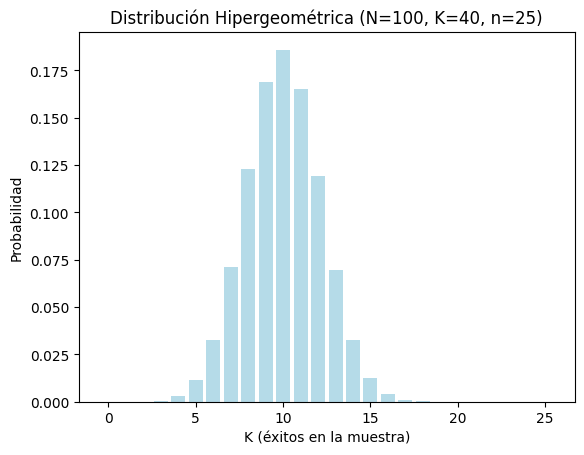

In [156]:
N, K, n = 100, 40, 25
xVals = np.arange(0, n+1)
yVals = hypergeom.pmf(xVals, N, K, n)

plt.bar(xVals, yVals, color="lightblue", alpha=0.9)
plt.title(f"Distribución Hipergeométrica (N={N}, K={K}, n={n})")
plt.xlabel("K (éxitos en la muestra)")
plt.ylabel("Probabilidad")
plt.show()
